In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import requests
from bs4 import BeautifulSoup
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mirae = pd.read_csv('/content/drive/MyDrive/미래에셋/mirae_stockname.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,23,34,35,36,40,41,42,46,47,48,62,63,81,92,93,94,98,99,100,104,105,106,120,121,139,150,151,152,156,157,158,162,163,164,178,179,197,208,209,210,214,215,216,220,221,222,236,237,255,266,267,268,272,273,274,278,279,280,294,295,313,324,325,326,330,331,332,336,337,338,352,353,371,382,383,384,388,389,390,394,395,396,410,411,429,440,441,442,446,447,448,452,453,454,468,469,487,498,499,500,504,505,506,510,511,512,526,527,545,556,557,558,562,563,564,568,569,570,584,585,603,614,615,616,620,621,622,626,627,628,642,643,661,672,673,674,678,679,680,684,685,686) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mirae.tail()

,Unnamed: 0,성별,연령,최초계좌개설일,고객등급_202105,주거래상품_202105,주거래매체_202105,국내주식자산_202105,해외주식자산_202105,상품자산_202105,보유종목수_202105,국내주식매수_202105,국내주식매도_202105,해외주식매수_202105,해외주식매도_202105,거래종목수_202105,m.Stock_접속일수_202105,m.Global_접속일수_202105,m.All_접속일수_202105,퇴직연금자산_202105,개인연금자산_202105,코스피거래비중_202105,코스닥거래비중_202105,선호시장_202105,손절횟수_202105,이익실현횟수_202105,DayTrading비중_202105,Swing비중_202105,Buy&Hold비중_202105,시총1천억미만선호도_202105,시총1천억이상3천억미만선호도_202105,시총3천억이상1조미만선호도_202105,시총1조이상선호도_202105,신용_202105,주식보유1위종목_202105,주식보유2위종목_202105,주식보유3위종목_202105,주식보유1위금액_202105,주식보유2위금액_202105,주식보유3위금액_202105,...,코스닥거래비중_202006,선호시장_202006,손절횟수_202006,이익실현횟수_202006,DayTrading비중_202006,Swing비중_202006,Buy&Hold비중_202006,시총1천억미만선호도_202006,시총1천억이상3천억미만선호도_202006,시총3천억이상1조미만선호도_202006,시총1조이상선호도_202006,신용_202006,주식보유1위종목_202006,주식보유2위종목_202006,주식보유3위종목_202006,주식보유1위금액_202006,주식보유2위금액_202006,주식보유3위금액_202006,주식매수1위종목_202006,주식매수2위종목_202006,주식매수3위종목_202006,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,주식매도1위종목_202006,주식매도2위종목_202006,주식매도3위종목_202006,주식매도1위금액_202006,주식매도2위금액_202006,주식매도3위금액_202006,Dr.Big의국내주식_202006,Dr.Big의해외주식_202006,Dr.Big의국내ETF_202006,Dr.Big의펀드연금_202006,Dr.Big의투자진단_202006,Dr.Big의시그널_202006,뉴스로종목포착_202006,해외ETF트렌드_202006,초고수의선택_202006,주간상품TOP10_202006
1499987,1499987,1.0,30대,201606.0,S,주식,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,8.0,92.0,코스닥,7.0,3.0,7.0,82.0,8.0,0.0,57.0,24.0,19.0,0.0,비보존 헬스케어,시너지이노베이션,NaN,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499988,1499988,1.0,40대,200705.0,H,주식,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,0.0,72.0,28.0,코스피,16.0,21.0,10.0,85.0,3.0,19.0,68.0,11.0,2.0,0.0,한국선재,서연탑메탈,깨끗한나라,0.0,0.0,0.0,...,28.0,코스피,9.0,12.0,18.0,78.0,4.0,55.0,39.0,6.0,0.0,0.0,인디에프,인디에프,인디에프,0.0,0.0,0.0,인디에프,NaN,NaN,0.0,0.0,0.0,좋은사람들,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499989,1499989,1.0,50대,200001.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499990,1499990,1.0,60대이상,201311.0,R,퇴직연금,1,400000.0,0.0,0.0,2.0,190000.0,170000.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,70.0,30.0,코스피,0.0,6.0,0.0,91.0,8.0,0.0,1.0,24.0,75.0,0.0,삼성SDI,삼성전자,SK바이오사이언스,230000.0,150000.0,11000.0,...,46.0,코스피,0.0,3.0,0.0,99.0,0.0,0.0,0.0,45.0,55.0,0.0,메디포스트,GS건설,NaN,0.0,0.0,0.0,메디포스트,대주전자재료,GS건설,0.0,0.0,0.0,대주전자재료,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499991,1499991,1.0,60대이상,200001.0,H,주식,1,9900000.0,0.0,30000.0,0.0,5800000.0,6900000.0,0.0,0.0,0.0,20.0,0.0,19.0,13000000.0,0.0,100.0,0.0,코스피,0.0,4.0,0.0,85.0,14.0,0.0,0.0,0.0,100.0,0.0,한국가스공사,NaN,NaN,7400000.0,2000000.0,740000.0,...,0.0,코스피,0.0,2.0,0.0,82.0,17.0,0.0,0.0,0.0,100.0,0.0,한국가스공사,한국전력공사,NaN,2500000.0,640000.0,200000.0,한국전력공사,NaN,NaN,540000.0,160000.0,140000.0,NaN,NaN,NaN,770000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mirae.dtypes

Unnamed: 0             int64
성별                   float64
연령                    object
최초계좌개설일              float64
고객등급_202105           object
                      ...   
Dr.Big의시그널_202006    float64
뉴스로종목포착_202006       float64
해외ETF트렌드_202006      float64
초고수의선택_202006        float64
주간상품TOP10_202006     float64
Length: 700, dtype: object

In [ ]:
mirae.shape

(1499992, 700)

In [ ]:
upjong_df = pd.read_csv('/content/drive/MyDrive/미래에셋/전처리/data/stock_with_upjong.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21,25,26,27,28,29,30,31,32,33,37,38,39,40,41,42,43,44,45,49,50,51,52,53,54,55,56,57,61,62,63,64,65,66,67,68,69,73,74,75,76,77,78,79,80,81,85,86,87,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,109,110,111,112,113,114,115,116,117,121,122,123,124,125,126,127,128,129,133,134,135,136,137,138,139,140,141,145,147,149) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
upjong_df.head()

,Unnamed: 0,주식매수1위종목_202105,주식매수1위종목_202105_중분류,주식매수1위종목_202105_소분류,주식매수2위종목_202105,주식매수2위종목_202105_중분류,주식매수2위종목_202105_소분류,주식매수3위종목_202105,주식매수3위종목_202105_중분류,주식매수3위종목_202105_소분류,주식매수1위금액_202105,주식매수2위금액_202105,주식매수3위금액_202105,주식매수1위종목_202104,주식매수1위종목_202104_중분류,주식매수1위종목_202104_소분류,주식매수2위종목_202104,주식매수2위종목_202104_중분류,주식매수2위종목_202104_소분류,주식매수3위종목_202104,주식매수3위종목_202104_중분류,주식매수3위종목_202104_소분류,주식매수1위금액_202104,주식매수2위금액_202104,주식매수3위금액_202104,주식매수1위종목_202103,주식매수1위종목_202103_중분류,주식매수1위종목_202103_소분류,주식매수2위종목_202103,주식매수2위종목_202103_중분류,주식매수2위종목_202103_소분류,주식매수3위종목_202103,주식매수3위종목_202103_중분류,주식매수3위종목_202103_소분류,주식매수1위금액_202103,주식매수2위금액_202103,주식매수3위금액_202103,주식매수1위종목_202102,주식매수1위종목_202102_중분류,주식매수1위종목_202102_소분류,...,주식매수1위종목_202008_소분류,주식매수2위종목_202008,주식매수2위종목_202008_중분류,주식매수2위종목_202008_소분류,주식매수3위종목_202008,주식매수3위종목_202008_중분류,주식매수3위종목_202008_소분류,주식매수1위금액_202008,주식매수2위금액_202008,주식매수3위금액_202008,주식매수1위종목_202007,주식매수1위종목_202007_중분류,주식매수1위종목_202007_소분류,주식매수2위종목_202007,주식매수2위종목_202007_중분류,주식매수2위종목_202007_소분류,주식매수3위종목_202007,주식매수3위종목_202007_중분류,주식매수3위종목_202007_소분류,주식매수1위금액_202007,주식매수2위금액_202007,주식매수3위금액_202007,주식매수1위종목_202006,주식매수1위종목_202006_중분류,주식매수1위종목_202006_소분류,주식매수2위종목_202006,주식매수2위종목_202006_중분류,주식매수2위종목_202006_소분류,주식매수3위종목_202006,주식매수3위종목_202006_중분류,주식매수3위종목_202006_소분류,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,총매수1위업종,총매수1위금액,총매수2위업종,총매수2위금액,총매수3위업종,총매수3위금액
0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,140000000.0,72000000.0,37000000.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,1,삼영에스앤씨,기술하드웨어와장비,전자장비와기기,0,0,0,0,0,0,2700000.0,2500000.0,860000.0,삼영에스앤씨,기술하드웨어와장비,전자장비와기기,0,0,0,0,0,0,2700000.0,2500000.0,860000.0,SK바이오사이언스,제약과생물공학,제약,엔시스,기술하드웨어와장비,전자장비와기기,0,0,0,1300000.0,1000000.0,990000.0,홈센타홀딩스,자본재,건축자재,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,기술하드웨어와장비,6400000.0,제약과생물공학,1300000.0,자본재,700000.0
2,2,0,0,0,0,0,0,0,0,0,2300000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2300000.0,0.0,0.0,효성첨단소재,소재,화학,포스코,소프트웨어와서비스,IT서비스,NAVER,미디어,양방향미디어와서비스,8500000.0,7100000.0,3000000.0,효성첨단소재,소재,화학,...,0,0,0,0,0,0,0,2100000.0,1700000.0,830000.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,소재,11500000.0,반도체와반도체장비,10100000.0,소프트웨어와서비스,7100000.0
3,3,현대제철,소재,철강,HMM,운송,해운사,팬오션,운송,해운사,25000000.0,23000000.0,12000000.0,현대제철,소재,철강,HMM,운송,해운사,팬오션,운송,해운사,25000000.0,23000000.0,12000000.0,HMM,운송,해운사,DB하이텍,반도체와반도체장비,반도체와반도체장비,동방,운송,항공화물운송과물류,15000000.0,12000000.0,7600000.0,동신건설,자본재,건설,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,운송,119600000.0,소재,50000000.0,반도체와반도체장비,45000000.0
4,4,카카오,미디어,양방향미디어와서비스,0,0,0,0,0,0,5000000.0,4500000.0,4400000.0,카카오,미디어,양방향미디어와서비스,0,0,0,0,0,0,5000000.0,4500000.0,4400000.0,현대자동차,0,0,천보,디스플레이,디스플레이장비및부품,0,0,0,660000.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,미디어,10000000.0,반도체와반도체장비,3900000.0,NaN,0.0


In [ ]:
upjong_df.shape

(1502190, 151)

# 시총나누기

In [ ]:
month_count = ['202105','202104','202103','202102','202101','202012','202011','202010','202009','202008','202007','202006']
mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] = pd.DataFrame(data = np.array([[0,0,0,0]]*1499992), columns=['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도'])
for i in month_count:
  mirae['시총1천억미만선호도'] = mirae['시총1천억미만선호도'] + mirae['시총1천억미만선호도_'+i]
  mirae['시총1천억이상3천억미만선호도'] = mirae['시총1천억이상3천억미만선호도'] + mirae['시총1천억이상3천억미만선호도_'+i]
  mirae['시총3천억이상1조미만선호도'] = mirae['시총3천억이상1조미만선호도'] + mirae['시총3천억이상1조미만선호도_'+i]
  mirae['시총1조이상선호도'] = mirae['시총1조이상선호도'] + mirae['시총1조이상선호도_'+i]

mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] = np.around(mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] / 12)
mirae['numb'] = 100/(mirae['시총1천억미만선호도']+mirae['시총1천억이상3천억미만선호도']+mirae['시총3천억이상1조미만선호도']+mirae['시총1조이상선호도'])
mirae['시총1천억미만선호도'] = np.around(mirae['numb']*mirae['시총1천억미만선호도'])
mirae['시총1천억이상3천억미만선호도'] = np.around(mirae['numb']*mirae['시총1천억이상3천억미만선호도'])
mirae['시총3천억이상1조미만선호도'] = np.around(mirae['numb']*mirae['시총3천억이상1조미만선호도'])
mirae['시총1조이상선호도'] = np.around(mirae['numb']*mirae['시총1조이상선호도'])

In [ ]:
from sklearn.cluster import KMeans

df_sichong = mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']]

# kmeans = KMeans(n_clusters=3)

# y = kmeans.fit_predict(df)

# df['Cluster'] = y
# df[['daytrading','swing','buy&hold']] = mirae[['daytrading','swing','buy&hold']]/100

# print(df.head())

In [ ]:
df_sichong = df_sichong[df_sichong['시총1천억미만선호도'].isna() == False]

In [ ]:
kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df_sichong)

df_sichong['sichong_cluster'] = y
df_sichong[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']] = mirae[['시총1천억미만선호도','시총1천억이상3천억미만선호도','시총3천억이상1조미만선호도','시총1조이상선호도']]

print(df_sichong.head())

   시총1천억미만선호도  시총1천억이상3천억미만선호도  시총3천억이상1조미만선호도  시총1조이상선호도  sichong_cluster
2         0.0              7.0            17.0       76.0                1
3         0.0              7.0            19.0       74.0                0
4         0.0              0.0            14.0       86.0                1
5        10.0             12.0            11.0       68.0                0
8        16.0             42.0            29.0       13.0                2


In [ ]:
df_sichong[df_sichong['sichong_cluster'] == 0].iloc[:30]
#시총 3천억 이상 1조 미만 선호

,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,sichong_cluster
3,0.0,7.0,19.0,74.0,0
5,10.0,12.0,11.0,68.0,0
10,12.0,43.0,0.0,45.0,0
11,0.0,10.0,44.0,46.0,0
17,0.0,25.0,9.0,65.0,0
20,0.0,18.0,24.0,59.0,0
22,14.0,19.0,23.0,43.0,0
25,0.0,0.0,48.0,52.0,0
26,4.0,27.0,33.0,35.0,0
28,1.0,6.0,26.0,67.0,0


In [ ]:
df_sichong[df_sichong['sichong_cluster'] == 1].iloc[:30]
#주로 시총 1조 이상 선호

,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,sichong_cluster
2,0.0,7.0,17.0,76.0,1
4,0.0,0.0,14.0,86.0,1
12,0.0,0.0,0.0,100.0,1
13,0.0,0.0,0.0,100.0,1
15,0.0,0.0,0.0,100.0,1
19,2.0,0.0,0.0,98.0,1
21,0.0,7.0,9.0,84.0,1
29,0.0,0.0,0.0,100.0,1
35,3.0,0.0,1.0,96.0,1
36,0.0,0.0,0.0,100.0,1


# 장단기 나누기

In [ ]:
month_count = ['202105','202104','202103','202102','202101','202012','202011','202010','202009','202008','202007','202006']
mirae[['daytrading','swing','buy&hold']] = pd.DataFrame(data = np.array([[0,0,0]]*1499992), columns=['daytrading','swing','buy&hold'])
for i in month_count:
  mirae['daytrading'] = mirae['daytrading'] + mirae['DayTrading비중_'+i]
  mirae['swing'] = mirae['swing'] + mirae['Swing비중_'+i]
  mirae['buy&hold'] = mirae['buy&hold'] + mirae['Buy&Hold비중_'+i]
mirae[['daytrading','swing','buy&hold']] = np.around(mirae[['daytrading','swing','buy&hold']] / 12)
mirae['numb'] = 100/(mirae['daytrading']+mirae['swing']+mirae['buy&hold'])
mirae['daytrading'] = np.around(mirae['numb']*mirae['daytrading'])
mirae['swing'] = np.around(mirae['numb']*mirae['swing'])
mirae['buy&hold'] = np.around(mirae['numb']*mirae['buy&hold'])

In [ ]:
from sklearn.cluster import KMeans

df_jangdan = mirae[['daytrading','swing','buy&hold']]

# kmeans = KMeans(n_clusters=3)

# y = kmeans.fit_predict(df)

# df['Cluster'] = y
# df[['daytrading','swing','buy&hold']] = mirae[['daytrading','swing','buy&hold']]/100

# print(df.head())

In [ ]:
df_jangdan = df_jangdan[df_jangdan['daytrading'].isna() == False]

In [ ]:
kmeans = KMeans(n_clusters=4)

y = kmeans.fit_predict(df_jangdan)

df_jangdan['jangdan_cluster'] = y
df_jangdan[['daytrading','swing','buy&hold']] = mirae[['daytrading','swing','buy&hold']]

print(df_jangdan.head())

   daytrading  swing  buy&hold  jangdan_cluster
1         0.0    0.0     100.0                1
2         0.0  100.0       0.0                0
3         2.0   74.0      24.0                2
4         0.0   81.0      19.0                0
5        41.0   57.0       1.0                3


In [ ]:
df_jangdan[df_jangdan['jangdan_cluster'] == 1].iloc[:30]
#1은 장기

,daytrading,swing,buy&hold,jangdan_cluster
1,0.0,0.0,100.0,1
6,0.0,0.0,100.0,1
7,0.0,26.0,74.0,1
15,18.0,18.0,65.0,1
16,0.0,0.0,100.0,1
18,5.0,22.0,73.0,1
110,0.0,0.0,100.0,1
163,0.0,32.0,68.0,1
247,0.0,0.0,100.0,1
250,0.0,15.0,85.0,1


#장기, 시총 3천억 이상 선호만 골라내기

In [ ]:
sichong_0 = list(df_sichong[df_sichong['sichong_cluster'] == 0].index)
sichong_1 = list(df_sichong[df_sichong['sichong_cluster'] == 1].index)
jangdan_1 = list(df_jangdan[df_jangdan['jangdan_cluster'] == 1].index)

In [ ]:
# union = list(set(list(set(sichong_0) | set(sichong_1))) & set(jangdan_1))

In [ ]:
upjong_df.iloc[list(set(jangdan_1)),:]['총매수1위업종'].value_counts()

제약과생물공학        6325
반도체와반도체장비      4932
자본재            2945
기술하드웨어와장비      2657
소재             2411
미디어            1682
소프트웨어와서비스      1496
자동차와부품         1348
운송             1253
전자와전기제품        1003
내구소비재와의류        926
건강관리장비와서비스      605
디스플레이           589
식품,음료,담배        525
에너지             500
소매              286
호텔,레스토랑,레저등     280
은행              248
다각화된금융          211
증권              180
보험              145
통신서비스           141
상업서비스와공급품       116
유틸리티             82
교육서비스            76
가정용품과개인용품        71
부동산              37
식품과기본식료품소매       20
기타               12
Name: 총매수1위업종, dtype: int64

In [ ]:
mirae.iloc[union,:]

,Unnamed: 0,성별,연령,최초계좌개설일,고객등급_202105,주거래상품_202105,주거래매체_202105,국내주식자산_202105,해외주식자산_202105,상품자산_202105,보유종목수_202105,국내주식매수_202105,국내주식매도_202105,해외주식매수_202105,해외주식매도_202105,거래종목수_202105,m.Stock_접속일수_202105,m.Global_접속일수_202105,m.All_접속일수_202105,퇴직연금자산_202105,개인연금자산_202105,코스피거래비중_202105,코스닥거래비중_202105,선호시장_202105,손절횟수_202105,이익실현횟수_202105,DayTrading비중_202105,Swing비중_202105,Buy&Hold비중_202105,시총1천억미만선호도_202105,시총1천억이상3천억미만선호도_202105,시총3천억이상1조미만선호도_202105,시총1조이상선호도_202105,신용_202105,주식보유1위종목_202105,주식보유2위종목_202105,주식보유3위종목_202105,주식보유1위금액_202105,주식보유2위금액_202105,주식보유3위금액_202105,...,시총1천억이상3천억미만선호도_202006,시총3천억이상1조미만선호도_202006,시총1조이상선호도_202006,신용_202006,주식보유1위종목_202006,주식보유2위종목_202006,주식보유3위종목_202006,주식보유1위금액_202006,주식보유2위금액_202006,주식보유3위금액_202006,주식매수1위종목_202006,주식매수2위종목_202006,주식매수3위종목_202006,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,주식매도1위종목_202006,주식매도2위종목_202006,주식매도3위종목_202006,주식매도1위금액_202006,주식매도2위금액_202006,주식매도3위금액_202006,Dr.Big의국내주식_202006,Dr.Big의해외주식_202006,Dr.Big의국내ETF_202006,Dr.Big의펀드연금_202006,Dr.Big의투자진단_202006,Dr.Big의시그널_202006,뉴스로종목포착_202006,해외ETF트렌드_202006,초고수의선택_202006,주간상품TOP10_202006,시총1천억미만선호도,시총1천억이상3천억미만선호도,시총3천억이상1조미만선호도,시총1조이상선호도,numb,daytrading,swing,buy&hold
393220,393220,2.0,30대,201508.0,S,주식,1,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,97.0,3.0,코스피,0.0,1.0,0.0,66.0,33.0,0.0,0.0,0.0,100.0,0.0,셀트리온,한국항공우주,신라젠,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,셀트리온,신라젠,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.010101,0.0,16.0,84.0
1048581,1048581,1.0,40대,201410.0,A,주식,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,2.0,98.0,코스닥,0.0,0.0,0.0,49.0,50.0,0.0,0.0,100.0,0.0,0.0,파인디지털,이아이디,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,2.380952,0.0,10.0,90.0
884740,884740,1.0,40대,200404.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,2.000000,0.0,20.0,80.0
32775,32775,1.0,60대이상,201508.0,A,주식,1,4900000.0,0.0,0.0,1.0,0.0,17000000.0,0.0,0.0,3.0,15.0,0.0,0.0,0.0,0.0,43.0,57.0,코스닥,2.0,0.0,0.0,74.0,25.0,0.0,47.0,53.0,0.0,0.0,넥스트아이,제주반도체,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,31000000.0,9900000.0,190000.0,NaN,NaN,NaN,20000000.0,11000000.0,0.0,NaN,NaN,NaN,12000000.0,9900000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,76.0,0.0,3.030303,0.0,30.0,70.0
1212423,1212423,2.0,50대,200801.0,A,주식,1,340000.0,0.0,0.0,1.0,0.0,250000.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,100.0,0.0,코스피,0.0,1.0,0.0,66.0,33.0,0.0,0.0,0.0,100.0,0.0,삼성중공업,SK하이닉스,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,삼성중공업,LG디스플레이,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.190476,0.0,7.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786414,786414,2.0,40대,202003.0,A,주식,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,100.0,0.0,코스피,0.0,0.0,0.0,49.0,50.0,0.0,0.0,0.0,100.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1.098901,0.0,32.0,68.0
917489,917489,2.0,20대이하,201908.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
upjong_final = upjong_df.iloc[union,:]

In [ ]:
upjong_final.sort_index(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
upjong_final

,Unnamed: 0,주식매수1위종목_202105,주식매수1위종목_202105_중분류,주식매수1위종목_202105_소분류,주식매수2위종목_202105,주식매수2위종목_202105_중분류,주식매수2위종목_202105_소분류,주식매수3위종목_202105,주식매수3위종목_202105_중분류,주식매수3위종목_202105_소분류,주식매수1위금액_202105,주식매수2위금액_202105,주식매수3위금액_202105,주식매수1위종목_202104,주식매수1위종목_202104_중분류,주식매수1위종목_202104_소분류,주식매수2위종목_202104,주식매수2위종목_202104_중분류,주식매수2위종목_202104_소분류,주식매수3위종목_202104,주식매수3위종목_202104_중분류,주식매수3위종목_202104_소분류,주식매수1위금액_202104,주식매수2위금액_202104,주식매수3위금액_202104,주식매수1위종목_202103,주식매수1위종목_202103_중분류,주식매수1위종목_202103_소분류,주식매수2위종목_202103,주식매수2위종목_202103_중분류,주식매수2위종목_202103_소분류,주식매수3위종목_202103,주식매수3위종목_202103_중분류,주식매수3위종목_202103_소분류,주식매수1위금액_202103,주식매수2위금액_202103,주식매수3위금액_202103,주식매수1위종목_202102,주식매수1위종목_202102_중분류,주식매수1위종목_202102_소분류,...,주식매수1위종목_202008_소분류,주식매수2위종목_202008,주식매수2위종목_202008_중분류,주식매수2위종목_202008_소분류,주식매수3위종목_202008,주식매수3위종목_202008_중분류,주식매수3위종목_202008_소분류,주식매수1위금액_202008,주식매수2위금액_202008,주식매수3위금액_202008,주식매수1위종목_202007,주식매수1위종목_202007_중분류,주식매수1위종목_202007_소분류,주식매수2위종목_202007,주식매수2위종목_202007_중분류,주식매수2위종목_202007_소분류,주식매수3위종목_202007,주식매수3위종목_202007_중분류,주식매수3위종목_202007_소분류,주식매수1위금액_202007,주식매수2위금액_202007,주식매수3위금액_202007,주식매수1위종목_202006,주식매수1위종목_202006_중분류,주식매수1위종목_202006_소분류,주식매수2위종목_202006,주식매수2위종목_202006_중분류,주식매수2위종목_202006_소분류,주식매수3위종목_202006,주식매수3위종목_202006_중분류,주식매수3위종목_202006_소분류,주식매수1위금액_202006,주식매수2위금액_202006,주식매수3위금액_202006,총매수1위업종,총매수1위금액,총매수2위업종,총매수2위금액,총매수3위업종,총매수3위금액
15,15,STX중공업,자본재,조선,0,0,0,0,0,0,0.0,0.0,0.0,STX중공업,자본재,조선,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,3700000.0,3400000.0,1700000.0,0,0,0,0,0,0,0,0,0,5100000.0,4400000.0,3000000.0,0,0,0,0,0,0,0,0,0,7500000.0,6500000.0,5300000.0,NaN,0.0,NaN,0.0,NaN,0.0
250,250,대한전선,자본재,전기장비,0,0,0,0,0,0,2400000.0,0.0,0.0,대한전선,자본재,전기장비,0,0,0,0,0,0,2400000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1600000.0,1500000.0,820000.0,0,0,0,...,0,0,0,0,0,0,0,24000000.0,21000000.0,13000000.0,0,0,0,0,0,0,0,0,0,7900000.0,340000.0,130000.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,미디어,25000000.0,반도체와반도체장비,16000000.0,소재,12000000.0
274,274,0,0,0,0,0,0,0,0,0,3000000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3000000.0,0.0,0.0,SK바이오사이언스,제약과생물공학,제약,씨에스윈드,자본재,기계,0,0,0,3700000.0,2400000.0,1800000.0,0,0,0,...,IT서비스,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,제약과생물공학,3700000.0,자본재,2400000.0,NaN,0.0
318,318,대성파인텍,자동차와부품,자동차부품,삼성전자,반도체와반도체장비,반도체와반도체장비,0,0,0,0.0,0.0,0.0,대성파인텍,자동차와부품,자동차부품,삼성전자,반도체와반도체장비,반도체와반도체장비,0,0,0,0.0,0.0,0.0,SK바이오사이언스,제약과생물공학,제약,라이프시맨틱스,건강관리장비와서비스,건강관리기술,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,5900000.0,4100000.0,3000000.0,0,0,0,0,0,0,0,0,0,5200000.0,2500000.0,1100000.0,0,0,0,0,0,0,0,0,0,4100000.0,3300000.0,2500000.0,소프트웨어와서비스,1500000.0,제약과생물공학,1500000.0,NaN,0.0
330,330,0,0,0,0,0,0,0,0,0,580000.0,0.0,0.0,0,0,0,0,0,0,0,0,0,580000.0,0.0,0.0,0,0,0,녹십자,제약과생물공학,제약,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499704,1499704,0,0,0,0,0,0,0,0,0,120000000.0,62000000.0,39000000.0,0,0,0,0,0,0,0,0,0,120000000.0,62000000.0,39000000.0,0,0,0,이노테라피,건강관리장비와서비스,건강관리장비와용품,0,0,0,140000000.0,73000000.0,45000000.0,0,0,0,...,전자장비와기기,0,0,0,0,0,0,120000000.0,82000000.0,52000000.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,130000000.0,72000000.0,45000000.0,자본재,150000000.0,기술하드웨어와장비,120000000.0,반도체와반도체장비,99000000.0
1499738,1499738,LX하우시스,자본재,건축자재,0,0,0,0,0,0,2400000.0,2000000.0,1900000.0,0,0,0,드림텍,기술하드웨어와장비,핸드셋,0,0,0,2400000.0,2000000.0,1900000.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,미래아이앤지,소프트웨어와서비스,IT서비스,...,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,자본재,2400000.0,기술하드웨어와장비,2000000.0,NaN,0.0
1499755,1499755,와이지엔터테인먼트,미디어,방송과엔터테인먼트,0,0

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_

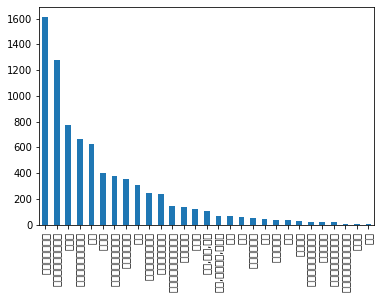

In [ ]:
upjong_final['총매수1위업종'].value_counts().plot(kind = 'bar');

In [ ]:
upjong_final['총매수1위업종'].value_counts()

제약과생물공학        1609
반도체와반도체장비      1278
자본재             771
기술하드웨어와장비       666
소재              629
미디어             403
소프트웨어와서비스       381
자동차와부품          353
운송              307
내구소비재와의류        242
전자와전기제품         241
건강관리장비와서비스      148
디스플레이           137
에너지             117
식품,음료,담배        107
호텔,레스토랑,레저등      66
은행               65
소매               61
다각화된금융           48
증권               43
통신서비스            39
보험               36
유틸리티             30
가정용품과개인용품        19
교육서비스            18
상업서비스와공급품        18
식품과기본식료품소매        8
부동산               7
기타                6
Name: 총매수1위업종, dtype: int64

In [ ]:
pd.concat([upjong_final['총매수1위업종'],upjong_final['총매수2위업종'],upjong_final['총매수3위업종']], axis = 0).value_counts()

제약과생물공학        3003
반도체와반도체장비      2554
자본재            1816
소재             1511
기술하드웨어와장비      1462
미디어            1037
소프트웨어와서비스       910
자동차와부품          850
운송              741
전자와전기제품         666
내구소비재와의류        625
건강관리장비와서비스      409
디스플레이           378
식품,음료,담배        341
에너지             329
소매              180
호텔,레스토랑,레저등     175
은행              161
다각화된금융          137
증권              124
통신서비스           101
보험               90
상업서비스와공급품        62
유틸리티             58
가정용품과개인용품        57
교육서비스            51
부동산              22
식품과기본식료품소매       21
기타               10
dtype: int64

In [ ]:
pd.concat([upjong_df['총매수1위업종'],upjong_df['총매수2위업종'],upjong_df['총매수3위업종']], axis = 0).value_counts()

제약과생물공학        206193
반도체와반도체장비      181401
자본재            122389
소재             100969
기술하드웨어와장비       98262
미디어             74152
소프트웨어와서비스       64295
자동차와부품          59828
운송              53713
전자와전기제품         47716
내구소비재와의류        41359
건강관리장비와서비스      27607
디스플레이           27012
식품,음료,담배        25760
에너지             24517
소매              14121
호텔,레스토랑,레저등     11950
은행              11263
다각화된금융          10425
증권               9092
통신서비스            6940
보험               6687
상업서비스와공급품        4563
가정용품과개인용품        3680
교육서비스            3556
유틸리티             3247
부동산              2151
식품과기본식료품소매       1045
기타                494
dtype: int64